In [234]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
import nltk
import spacy
import codecs
import requests

from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

## Amazon product - Samsung Galaxy S23 Ultra

In [235]:
# Multi-page web-scraping
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': "https://www.amazon.in/Samsung-Galaxy-Ultra-Green-Storage/dp/B0BTYWFXKC/ref=sr_1_3?crid=2QP2AZBZBCJMP&keywords=samsung+galaxy+s23+ultra+5g&qid=1699903054&sprefix=%2Caps%2C226&sr=8-3",
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

In [236]:
# Looping through multiple pages
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [237]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [238]:
for x in tqdm_notebook(range(160)):
    soup = get_soup("https://www.amazon.in/product-reviews/B0BTYWFXKC/ref=cm_cr_arp_d_show_all?ie=UTF8&reviewerType=all_reviews&pageNumber={x}")
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

## Save results to a data frame , then export as csv

In [239]:
data = pd.DataFrame(reviewlist)
data

,Title,Rating,Review,Review_Date
0,4.0 out of 5 stars\nVery impressive product,4.0,"The appearance of phone is very classy, perfor...",Reviewed in India on 6 November 2023
1,2.0 out of 5 stars\nMissing Text and other opt...,2.0,Liked- photos / zooming.Dislikes- difficult to...,Reviewed in India on 6 November 2023
2,5.0 out of 5 stars\nBest Android Phone,5.0,I am Happy and fully satisfied with my new S23...,Reviewed in India on 28 October 2023
3,5.0 out of 5 stars\nBest smart phone in the ma...,5.0,Best smart phone in the market best camera and...,Reviewed in India on 26 October 2023
4,2.0 out of 5 stars\nS23 ultra phone received ...,2.0,All is good. And everything is working fine e...,Reviewed in India on 28 October 2023
...,...,...,...,...
1435,2.0 out of 5 stars\nS23 ultra phone received ...,2.0,All is good. And everything is working fine e...,Reviewed in India on 28 October 2023
1436,4.0 out of 5 stars\nGood phone at this price,4.0,Best than iPhoneI love the s penNo phone can b...,Reviewed in India on 7 October 2023
1437,5.0 out of 5 stars\nPhoto,5.0,,Reviewed in India on 6 November 2023
1438,5.0 out of 5 stars\nVery good phone,5.0,Very good phone and camera. At night pics came...,Reviewed in India on 14 October 2023


In [240]:
data["Review_Date"]=data["Review_Date"].replace("Reviewed in India on", "",regex= True)
data.head(50)

,Title,Rating,Review,Review_Date
0,4.0 out of 5 stars\nVery impressive product,4.0,"The appearance of phone is very classy, perfor...",6 November 2023
1,2.0 out of 5 stars\nMissing Text and other opt...,2.0,Liked- photos / zooming.Dislikes- difficult to...,6 November 2023
2,5.0 out of 5 stars\nBest Android Phone,5.0,I am Happy and fully satisfied with my new S23...,28 October 2023
3,5.0 out of 5 stars\nBest smart phone in the ma...,5.0,Best smart phone in the market best camera and...,26 October 2023
4,2.0 out of 5 stars\nS23 ultra phone received ...,2.0,All is good. And everything is working fine e...,28 October 2023
5,4.0 out of 5 stars\nGood phone at this price,4.0,Best than iPhoneI love the s penNo phone can b...,7 October 2023
6,5.0 out of 5 stars\nPhoto,5.0,,6 November 2023
7,5.0 out of 5 stars\nVery good phone,5.0,Very good phone and camera. At night pics came...,14 October 2023
8,5.0 out of 5 stars\nBetter than iPhone,5.0,It has best camera I have ever seenIts process...,16 October 2023
9,4.0 out of 5 stars\nVery impressive product,4.0,"The appearance of phone is very classy, perfor...",6 November 2023


In [241]:
data.to_csv("samsung_Review.csv")

## Load Dataset

In [242]:
reviews = pd.read_csv("samsung_Review.csv")
reviews.drop(["Unnamed: 0"],inplace = True ,axis = 1)
reviews

,Title,Rating,Review,Review_Date
0,4.0 out of 5 stars\nVery impressive product,4.0,"The appearance of phone is very classy, perfor...",6 November 2023
1,2.0 out of 5 stars\nMissing Text and other opt...,2.0,Liked- photos / zooming.Dislikes- difficult to...,6 November 2023
2,5.0 out of 5 stars\nBest Android Phone,5.0,I am Happy and fully satisfied with my new S23...,28 October 2023
3,5.0 out of 5 stars\nBest smart phone in the ma...,5.0,Best smart phone in the market best camera and...,26 October 2023
4,2.0 out of 5 stars\nS23 ultra phone received ...,2.0,All is good. And everything is working fine e...,28 October 2023
...,...,...,...,...
1435,2.0 out of 5 stars\nS23 ultra phone received ...,2.0,All is good. And everything is working fine e...,28 October 2023
1436,4.0 out of 5 stars\nGood phone at this price,4.0,Best than iPhoneI love the s penNo phone can b...,7 October 2023
1437,5.0 out of 5 stars\nPhoto,5.0,NaN,6 November 2023
1438,5.0 out of 5 stars\nVery good phone,5.0,Very good phone and camera. At night pics came...,14 October 2023


## Data Exploration

In [243]:
reviews.Rating.describe()

count    1440.000000
mean        4.111111
std         1.197119
min         2.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

In [246]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        1440 non-null   object 
 1   Rating       1440 non-null   float64
 2   Review       1280 non-null   object 
 3   Review_Date  1440 non-null   object 
dtypes: float64(1), object(3)
memory usage: 45.1+ KB


In [247]:
# Checking Null values
reviews.isnull().sum()

Title            0
Rating           0
Review         160
Review_Date      0
dtype: int64

In [248]:
reviews.dropna(subset=['Review'],inplace=True)
reviews

,Title,Rating,Review,Review_Date
0,4.0 out of 5 stars\nVery impressive product,4.0,"The appearance of phone is very classy, perfor...",6 November 2023
1,2.0 out of 5 stars\nMissing Text and other opt...,2.0,Liked- photos / zooming.Dislikes- difficult to...,6 November 2023
2,5.0 out of 5 stars\nBest Android Phone,5.0,I am Happy and fully satisfied with my new S23...,28 October 2023
3,5.0 out of 5 stars\nBest smart phone in the ma...,5.0,Best smart phone in the market best camera and...,26 October 2023
4,2.0 out of 5 stars\nS23 ultra phone received ...,2.0,All is good. And everything is working fine e...,28 October 2023
...,...,...,...,...
1434,5.0 out of 5 stars\nBest smart phone in the ma...,5.0,Best smart phone in the market best camera and...,26 October 2023
1435,2.0 out of 5 stars\nS23 ultra phone received ...,2.0,All is good. And everything is working fine e...,28 October 2023
1436,4.0 out of 5 stars\nGood phone at this price,4.0,Best than iPhoneI love the s penNo phone can b...,7 October 2023
1438,5.0 out of 5 stars\nVery good phone,5.0,Very good phone and camera. At night pics came...,14 October 2023


In [249]:
reviews["Rating"].value_counts()

5.0    640
4.0    320
2.0    320
Name: Rating, dtype: int64

## Data Visualization

Data vs Review count

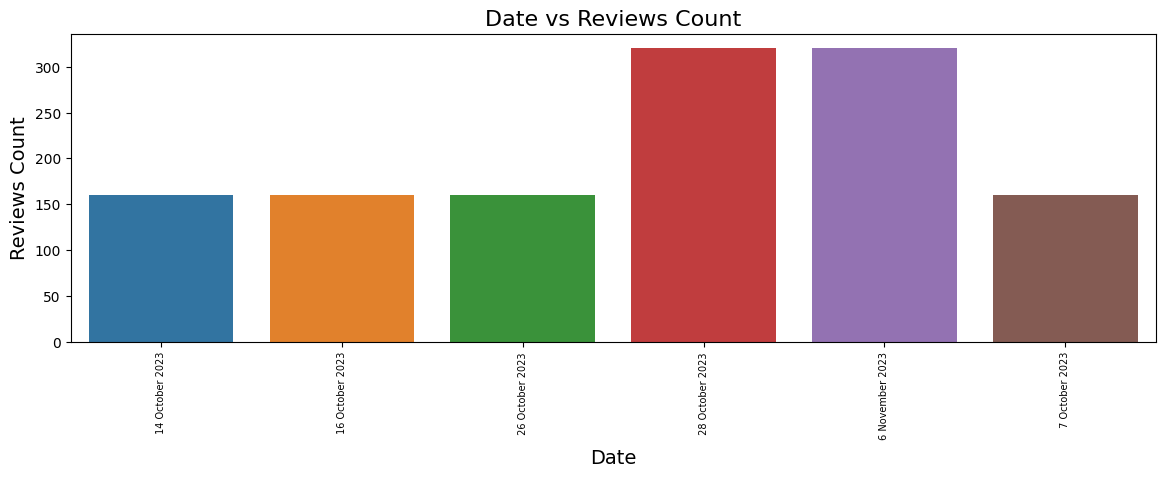

In [250]:
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(14,4))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

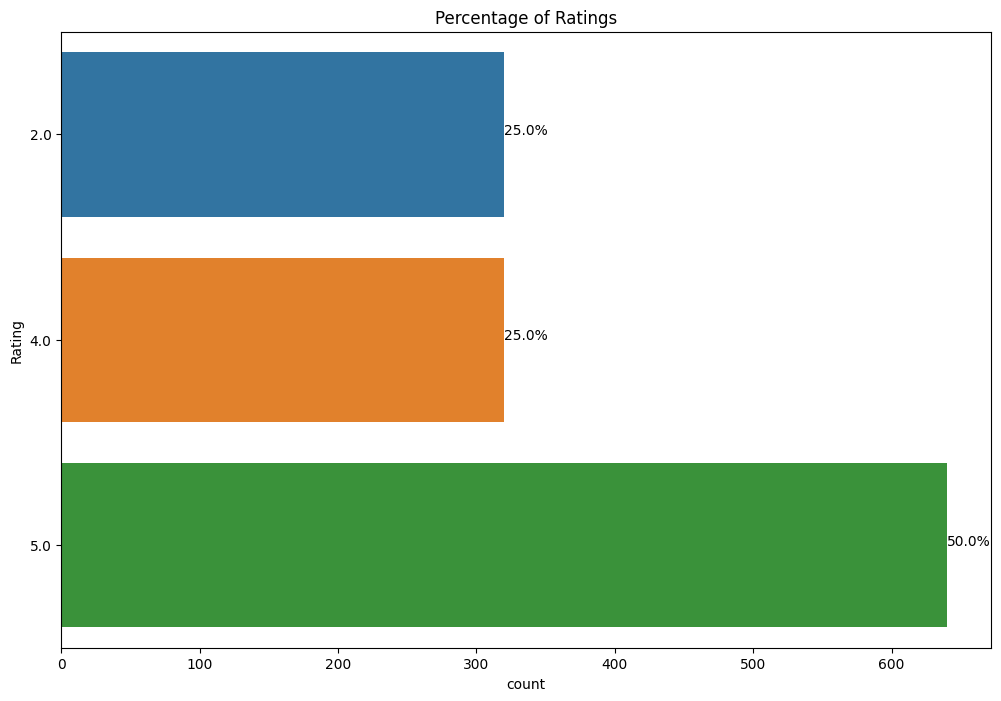

In [253]:
# Percentage of Rating
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

## BasicText Preprocessing for Sentiment Analysis

In [254]:
# Spelling correction
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    The appearance of phone is very class, perform...
1    Liked- photo / booming.Dislikes- difficult to ...
2    I am Happy and fully satisfied with my new S23...
3    West smart phone in the market best camera and...
4    All is good. And everything  is working fine e...
Name: Review, dtype: object

In [255]:
s23_review= reviews[["Review"]]
s23_review

,Review
0,"The appearance of phone is very classy, perfor..."
1,Liked- photos / zooming.Dislikes- difficult to...
2,I am Happy and fully satisfied with my new S23...
3,Best smart phone in the market best camera and...
4,All is good. And everything is working fine e...
...,...
1434,Best smart phone in the market best camera and...
1435,All is good. And everything is working fine e...
1436,Best than iPhoneI love the s penNo phone can b...
1438,Very good phone and camera. At night pics came...


In [256]:
# Resetting index
s23_review.reset_index(drop = True,inplace = True)

In [259]:
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')
s23_review['Review'] = s23_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [261]:
# Lemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(s23_review))):
    cleaned = re.sub('[^a-zA-Z]', " ", s23_review["Review"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

[nltk_data] Downloading package wordnet to /root/nltk_data...


  0%|          | 0/1280 [00:00<?, ?it/s]

In [262]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": s23_review.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,appearance phone classy performance also good ...,"the appearance phone classy, performance also ..."
1,liked photo zooming dislike difficult scan tex...,liked- photos / zooming.dislikes- difficult sc...
2,happy fully satisfied new ultra nothing complain,i happy fully satisfied new s23 ultra. nothing...
3,best smart phone market best camera performanc...,best smart phone market best camera performanc...
4,good everything working fine excluding volume ...,all good. and everything working fine excludin...


## Text pre-processing Techniques

In [263]:
# Removing "@names"
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

In [264]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,appearance phone classy performance also good ...,"the appearance phone classy, performance also ..."
1,liked photo zooming dislike difficult scan tex...,liked- photos / zooming.dislikes- difficult sc...
2,happy fully satisfied new ultra nothing complain,i happy fully satisfied new s23 ultra. nothing...
3,best smart phone market best camera performanc...,best smart phone market best camera performanc...
4,good everything working fine excluding volume ...,all good. and everything working fine excludin...
5,best iphonei love penno phone beat displayi gi...,best iphonei love penno phone beat displayi gi...
6,good phone camera night pic camera excellent w...,very good phone camera. at night pics camera e...
7,best camera ever seenits processor smoothand p...,it best camera i ever seenits processor smooth...
8,appearance phone classy performance also good ...,"the appearance phone classy, performance also ..."
9,liked photo zooming dislike difficult scan tex...,liked- photos / zooming.dislikes- difficult sc...


In [265]:
# Removing links (http / https)
cleaned_reviews = []

for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,appearance phone classy performance also good ...,"the appearance phone classy, performance also ..."
1,liked photo zooming dislike difficult scan tex...,liked- photos / zooming.dislikes- difficult sc...
2,happy fully satisfied new ultra nothing complain,i happy fully satisfied new s23 ultra. nothing...
3,best smart phone market best camera performanc...,best smart phone market best camera performanc...
4,good everything working fine excluding volume ...,all good. and everything working fine excludin...
5,best iphonei love penno phone beat displayi gi...,best iphonei love penno phone beat displayi gi...
6,good phone camera night pic camera excellent w...,very good phone camera. at night pics camera e...
7,best camera ever seenits processor smoothand p...,it best camera i ever seenits processor smooth...
8,appearance phone classy performance also good ...,"the appearance phone classy, performance also ..."
9,liked photo zooming dislike difficult scan tex...,liked- photos / zooming.dislikes- difficult sc...


In [266]:
# Removing reviews with empty text
dataframe = dataframe[dataframe["Clean_Reviews"]!=""]
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,appearance phone classy performance also good ...,"the appearance phone classy, performance also ..."
1,liked photo zooming dislike difficult scan tex...,liked- photos / zooming.dislikes- difficult sc...
2,happy fully satisfied new ultra nothing complain,i happy fully satisfied new s23 ultra. nothing...
3,best smart phone market best camera performanc...,best smart phone market best camera performanc...
4,good everything working fine excluding volume ...,all good. and everything working fine excludin...
5,best iphonei love penno phone beat displayi gi...,best iphonei love penno phone beat displayi gi...
6,good phone camera night pic camera excellent w...,very good phone camera. at night pics camera e...
7,best camera ever seenits processor smoothand p...,it best camera i ever seenits processor smooth...
8,appearance phone classy performance also good ...,"the appearance phone classy, performance also ..."
9,liked photo zooming dislike difficult scan tex...,liked- photos / zooming.dislikes- difficult sc...


In [267]:
# Dropping duplicate rows
dataframe.drop_duplicates(subset=["Clean_Reviews"], keep = False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,appearance phone classy performance also good ...,"the appearance phone classy, performance also ..."
1,liked photo zooming dislike difficult scan tex...,liked- photos / zooming.dislikes- difficult sc...
2,happy fully satisfied new ultra nothing complain,i happy fully satisfied new s23 ultra. nothing...
3,best smart phone market best camera performanc...,best smart phone market best camera performanc...
4,good everything working fine excluding volume ...,all good. and everything working fine excludin...
5,best iphonei love penno phone beat displayi gi...,best iphonei love penno phone beat displayi gi...
6,good phone camera night pic camera excellent w...,very good phone camera. at night pics camera e...
7,best camera ever seenits processor smoothand p...,it best camera i ever seenits processor smooth...
8,appearance phone classy performance also good ...,"the appearance phone classy, performance also ..."
9,liked photo zooming dislike difficult scan tex...,liked- photos / zooming.dislikes- difficult sc...


In [268]:
# Function to remove emoji
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [269]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,appearance phone classy performance also good ...,"the appearance phone classy, performance also ..."
1,liked photo zooming dislike difficult scan tex...,liked- photos / zooming.dislikes- difficult sc...
2,happy fully satisfied new ultra nothing complain,i happy fully satisfied new s23 ultra. nothing...
3,best smart phone market best camera performanc...,best smart phone market best camera performanc...
4,good everything working fine excluding volume ...,all good. and everything working fine excludin...
5,best iphonei love penno phone beat displayi gi...,best iphonei love penno phone beat displayi gi...
6,good phone camera night pic camera excellent w...,very good phone camera. at night pics camera e...
7,best camera ever seenits processor smoothand p...,it best camera i ever seenits processor smooth...
8,appearance phone classy performance also good ...,"the appearance phone classy, performance also ..."
9,liked photo zooming dislike difficult scan tex...,liked- photos / zooming.dislikes- difficult sc...


In [278]:
from google.colab import files
uploaded=files.upload()

Saving stop.txt to stop.txt


In [280]:
#  Removing Stop Words
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [281]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [282]:
my_stop_words = stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():

    # filerting out all the stopwords
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]

    # finally creating tweets list of tuples containing stopwords(list) and sentimentType
    cleaned_tweets.append(' '.join(words_without_stopwords))

dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,appearance phone classy performance also good ...,"the appearance phone classy, performance also ..."
1,liked photo zooming dislike difficult scan tex...,liked- photos / zooming.dislikes- difficult sc...
2,happy fully satisfied new ultra nothing complain,i happy fully satisfied new s23 ultra. nothing...
3,best smart phone market best camera performanc...,best smart phone market best camera performanc...
4,good everything working fine excluding volume ...,all good. and everything working fine excludin...
5,best iphonei love penno phone beat displayi gi...,best iphonei love penno phone beat displayi gi...
6,good phone camera night pic camera excellent w...,very good phone camera. at night pics camera e...
7,best camera ever seenits processor smoothand p...,it best camera i ever seenits processor smooth...
8,appearance phone classy performance also good ...,"the appearance phone classy, performance also ..."
9,liked photo zooming dislike difficult scan tex...,liked- photos / zooming.dislikes- difficult sc...


In [285]:
# Tokenize clean Reviews
from textblob import TextBlob
nltk.download('punkt')
TextBlob(dataframe["Clean_Reviews"][1]).words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


WordList(['liked', 'photo', 'zooming', 'dislike', 'difficult', 'scan', 'text', 'google', 'lens', 'missing', 'various', 'setting', 'option', 'icon', 'gallery', 'either', 'shortcut', 'icon', 'showing', 'unaxpected', 'black', 'white', 'using', 'z', 'fold', 'far', 'batter', 'spen', 'type', 'top', 'phone', 'totally', 'disappointed', 'filling', 'using', 'defected', 'phone', 'need', 'care', 'thank'])

In [286]:
tokenized_review = dataframe["Clean_Reviews"].apply(lambda x: x.split())
tokenized_review.head(10)

0    [appearance, phone, classy, performance, also,...
1    [liked, photo, zooming, dislike, difficult, sc...
2    [happy, fully, satisfied, new, ultra, nothing,...
3    [best, smart, phone, market, best, camera, per...
4    [good, everything, working, fine, excluding, v...
5    [best, iphonei, love, penno, phone, beat, disp...
6    [good, phone, camera, night, pic, camera, exce...
7    [best, camera, ever, seenits, processor, smoot...
8    [appearance, phone, classy, performance, also,...
9    [liked, photo, zooming, dislike, difficult, sc...
Name: Clean_Reviews, dtype: object

In [287]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews
0,appearance phone classy performance also good ...,"the appearance phone classy, performance also ...","[appearance, phone, classy, performance, also,..."
1,liked photo zooming dislike difficult scan tex...,liked- photos / zooming.dislikes- difficult sc...,"[liked, photo, zooming, dislike, difficult, sc..."
2,happy fully satisfied new ultra nothing complain,i happy fully satisfied new s23 ultra. nothing...,"[happy, fully, satisfied, new, ultra, nothing,..."
3,best smart phone market best camera performanc...,best smart phone market best camera performanc...,"[best, smart, phone, market, best, camera, per..."
4,good everything working fine excluding volume ...,all good. and everything working fine excludin...,"[good, everything, working, fine, excluding, v..."
5,best iphonei love penno phone beat displayi gi...,best iphonei love penno phone beat displayi gi...,"[best, iphonei, love, penno, phone, beat, disp..."
6,good phone camera night pic camera excellent w...,very good phone camera. at night pics camera e...,"[good, phone, camera, night, pic, camera, exce..."
7,best camera ever seenits processor smoothand p...,it best camera i ever seenits processor smooth...,"[best, camera, ever, seenits, processor, smoot..."
8,appearance phone classy performance also good ...,"the appearance phone classy, performance also ...","[appearance, phone, classy, performance, also,..."
9,liked photo zooming dislike difficult scan tex...,liked- photos / zooming.dislikes- difficult sc...,"[liked, photo, zooming, dislike, difficult, sc..."


In [288]:
# Converting Words to Stemmer
stemmer = SnowballStemmer("english")

In [289]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,appear phone classi perform also good samsung ...
1,like photo zoom dislik difficult scan text goo...
2,happi fulli satisfi new ultra noth complain
3,best smart phone market best camera perform li...
4,good everyth work fine exclud volum button bod...
...,...
1275,best smart phone market best camera perform li...
1276,good everyth work fine exclud volum button bod...
1277,best iphonei love penno phone beat displayi gi...
1278,good phone camera night pic camera excel wife ...


In [290]:
# Converting Words to Lemma
word_lemmatizer = WordNetLemmatizer()
yy = pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

,stemmed
0,appearance phone classy performance also good ...
1,liked photo zooming dislike difficult scan tex...
2,happy fully satisfied new ultra nothing complain
3,best smart phone market best camera performanc...
4,good everything working fine excluding volume ...
...,...
1275,best smart phone market best camera performanc...
1276,good everything working fine excluding volume ...
1277,best iphonei love penno phone beat displayi gi...
1278,good phone camera night pic camera excellent w...


## Feature Extraction

In [291]:
# Applying bag of words without N grams
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [294]:
print(cv.get_feature_names_out()[50:100])

['lens' 'light' 'like' 'liked' 'love' 'loved' 'market' 'missing' 'moneyit'
 'need' 'new' 'night' 'nothing' 'option' 'overpriced' 'pen' 'penno'
 'performance' 'phone' 'photo' 'pic' 'power' 'processor' 'product'
 'provide' 'quality' 'really' 'samsung' 'satisfied' 'scan' 'seenits'
 'seller' 'send' 'setting' 'shortcut' 'showing' 'smart' 'smoothand' 'spen'
 'text' 'thank' 'time' 'top' 'totally' 'type' 'ultra' 'unaxpected' 'using'
 'value' 'various']


In [296]:
print(cv.get_feature_names_out()[:50])

['also' 'amazing' 'amazon' 'appearance' 'backup' 'batter' 'battery' 'beat'
 'best' 'better' 'black' 'body' 'box' 'button' 'buy' 'camera' 'care'
 'charger' 'classy' 'complain' 'day' 'defected' 'difficult' 'disappointed'
 'dislike' 'display' 'displayi' 'either' 'ever' 'everything' 'excellent'
 'excluding' 'far' 'filling' 'fine' 'fold' 'fully' 'gallery' 'gifted' 'go'
 'good' 'google' 'happy' 'heavy' 'helping' 'however' 'icon' 'improved'
 'iphonei' 'itit']


In [297]:
print(tweetscv.toarray()[100:200])

[[0 0 1 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [298]:
# CountVectorizer with N-grams (Bigrams & Trigrams)
dataframe = dataframe.reset_index(drop=True)

In [299]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/1280 [00:00<?, ?it/s]

In [301]:
corpus[3]

'best smart phone market best camera perform like wow amaz'

## Applying Countvectorizer (Creating the Bag of Words model)

In [302]:
cv = CountVectorizer(max_features=1546,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [303]:
X.shape

(1280, 369)

In [304]:
cv.get_feature_names_out()[:20]

array(['also', 'also good', 'also good samsung', 'amaz', 'amazon',
       'amazon buy', 'appear', 'appear phone', 'appear phone classi',
       'backup', 'backup better', 'batter', 'batter spen',
       'batter spen type', 'batteri', 'batteri backup',
       'batteri backup better', 'batteri power', 'batteri power improv',
       'beat'], dtype=object)

In [305]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [307]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names_out())
count_df

,also,also good,also good samsung,amaz,amazon,amazon buy,appear,appear phone,appear phone classi,backup,...,wife use,wife use ultra,work,work fine,work fine exclud,wow,wow amaz,zoom,zoom dislik,zoom dislik difficult
0,1,1,1,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,0,0,0,0,1,1,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1276,0,0,0,0,1,1,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
1277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1278,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


## TF-IDF Vectorizer

In [308]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/1280 [00:00<?, ?it/s]

In [310]:
corpus[8]

'appear phone classi perform also good samsung provid charger box realli overpr product batteri backup better'

## Applying TF-IDF Vectorizer

In [311]:
tfidf_v = TfidfVectorizer(max_features=1546,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [312]:
X.shape

(1280, 369)

In [313]:
tfidf_v.get_feature_names_out()[:20]

array(['also', 'also good', 'also good samsung', 'amaz', 'amazon',
       'amazon buy', 'appear', 'appear phone', 'appear phone classi',
       'backup', 'backup better', 'batter', 'batter spen',
       'batter spen type', 'batteri', 'batteri backup',
       'batteri backup better', 'batteri power', 'batteri power improv',
       'beat'], dtype=object)

In [314]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [316]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())
count_df

,also,also good,also good samsung,amaz,amazon,amazon buy,appear,appear phone,appear phone classi,backup,...,wife use,wife use ultra,work,work fine,work fine exclud,wow,wow amaz,zoom,zoom dislik,zoom dislik difficult
0,0.153488,0.153488,0.153488,0.000000,0.000000,0.000000,0.153488,0.153488,0.153488,0.153488,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.093445,0.093445,0.093445
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.205586,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.205586,0.205586,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.163044,0.163044,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.163044,0.163044,0.163044,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,0.000000,0.000000,0.000000,0.205586,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.205586,0.205586,0.000000,0.000000,0.000000
1276,0.000000,0.000000,0.000000,0.000000,0.163044,0.163044,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.163044,0.163044,0.163044,0.000000,0.000000,0.000000,0.000000,0.000000
1277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1278,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.095231,0.095231,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Named Entity Rrecognization(NER)

In [317]:
reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]
# Joining the list into one string/text
reviews_text = ' '.join(reviews)
reviews_text[0:2000]

'appearance phone classy performance also good samsung provide charger box really overpriced product battery backup better liked photo zooming dislike difficult scan text google lens missing various setting option icon gallery either shortcut icon showing unaxpected black white using z fold far batter spen type top phone totally disappointed filling using defected phone need care thank happy fully satisfied new ultra nothing complain best smart phone market best camera performance like wow amazing good everything working fine excluding volume button body helping either samsung seller amazon buy best iphonei love penno phone beat displayi gifted wife loved good phone camera night pic camera excellent wife using ultra battery power improved however camera quality day time ultra send ultra ultra heavy ultra want light phone go ultra good display best display best camera ever seenits processor smoothand pen loved itit value moneyit heavy weight light weighted appearance phone classy perfor

In [318]:
# POS (Parts Of Speech) Tagging
nlp = spacy.load('en_core_web_sm')

one_block = reviews_text[0:2000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [319]:
for token in doc_block[:50]:
    print(token,token.pos_)

appearance NOUN
phone NOUN
classy NOUN
performance NOUN
also ADV
good ADJ
samsung PROPN
provide VERB
charger PROPN
box PROPN
really ADV
overpriced VERB
product NOUN
battery NOUN
backup NOUN
better ADV
liked VERB
photo NOUN
zooming NOUN
dislike PROPN
difficult ADJ
scan PROPN
text NOUN
google PROPN
lens NOUN
missing VERB
various ADJ
setting NOUN
option NOUN
icon NOUN
gallery NOUN
either CCONJ
shortcut VERB
icon NOUN
showing VERB
unaxpected ADJ
black ADJ
white NOUN
using VERB
z NOUN
fold ADJ
far ADV
batter ADJ
spen ADJ
type NOUN
top ADJ
phone NOUN
totally ADV
disappointed VERB
filling NOUN


In [320]:
# Filtering the nouns and verbs only
nlp.max_length =  1222000
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['option', 'icon', 'gallery', 'shortcut', 'icon', 'showing', 'white', 'using', 'z', 'type', 'phone', 'disappointed', 'filling', 'using', 'phone', 'need', 'care', 'thank', 'complain', 'phone', 'market', 'camera', 'performance', 'working', 'excluding', 'volume', 'button', 'body', 'helping', 'buy', 'love', 'phone', 'beat', 'displayi', 'wife', 'loved', 'phone', 'camera', 'night', 'pic', 'camera', 'wife', 'using', 'battery', 'power', 'improved', 'camera', 'quality', 'day', 'time', 'send', 'ultra', 'want', 'phone', 'go', 'display', 'display', 'camera', 'seenits', 'processor', 'smoothand', 'loved', 'itit', 'value', 'moneyit', 'weight', 'light', 'weighted', 'appearance', 'phone', 'classy', 'performance', 'provide', 'overpriced', 'product', 'battery', 'backup', 'liked', 'photo', 'zooming', 'text', 'lens', 'missing', 'setting', 'option', 'icon', 'gallery', 'shortcut', 'icon', 'showing', 'white', 'using', 'z', 'type', 'phone', 'disappointed', 'filling', 'using', 'phone', 'need']


In [321]:
# Counting the noun and verb tokens
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10]

,word,count
0,phone,1120
1,camera,800
2,using,480
3,performance,320
4,battery,320
5,icon,320
6,wife,320
7,loved,320
8,display,320
9,appearance,160


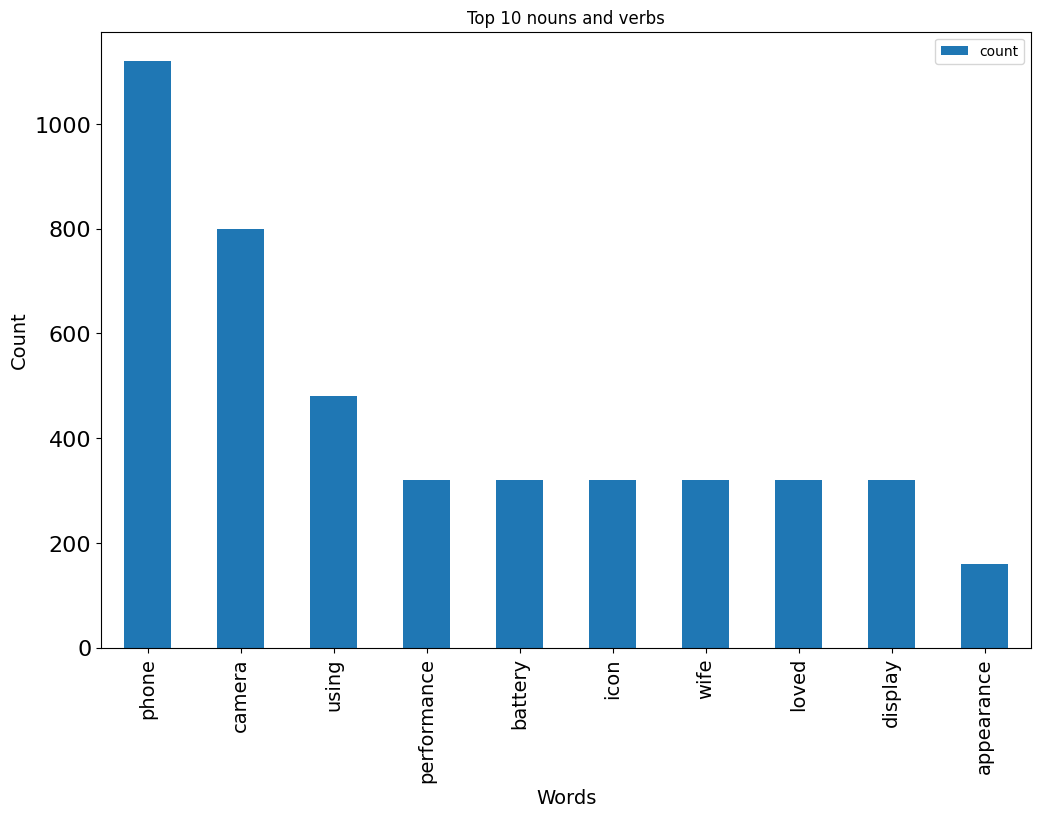

In [322]:
# Visualization (top 10 noun and verb)
# Barchart
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs', fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# Feature Extraction

In [323]:
# BOW Features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

In [324]:
# TF-IDF Features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

## Fetch Sentiment using TextBlob

In [325]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [326]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,1120
neg,160


## subjectivity and Polarity

In [327]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity

# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity

dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity
0,appearance phone classy performance also good ...,"the appearance phone classy, performance also ...","[appearance, phone, classy, performance, also,...",0.550000,0.375000
1,liked photo zooming dislike difficult scan tex...,liked- photos / zooming.dislikes- difficult sc...,"[liked, photo, zooming, dislike, difficult, sc...",0.559259,-0.046296
2,happy fully satisfied new ultra nothing complain,i happy fully satisfied new s23 ultra. nothing...,"[happy, fully, satisfied, new, ultra, nothing,...",0.818182,0.478788
3,best smart phone market best camera performanc...,best smart phone market best camera performanc...,"[best, smart, phone, market, best, camera, per...",0.628571,0.582857
4,good everything working fine excluding volume ...,all good. and everything working fine excludin...,"[good, everything, working, fine, excluding, v...",0.550000,0.558333


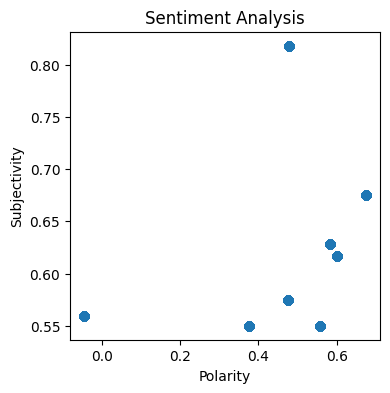

In [330]:
f, axes = plt.subplots(figsize = (4,4))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

In [331]:
dataframe['sentiment'] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity,sentiment
0,appearance phone classy performance also good ...,"the appearance phone classy, performance also ...","[appearance, phone, classy, performance, also,...",0.550000,0.375000,pos
1,liked photo zooming dislike difficult scan tex...,liked- photos / zooming.dislikes- difficult sc...,"[liked, photo, zooming, dislike, difficult, sc...",0.559259,-0.046296,neg
2,happy fully satisfied new ultra nothing complain,i happy fully satisfied new s23 ultra. nothing...,"[happy, fully, satisfied, new, ultra, nothing,...",0.818182,0.478788,pos
3,best smart phone market best camera performanc...,best smart phone market best camera performanc...,"[best, smart, phone, market, best, camera, per...",0.628571,0.582857,pos
4,good everything working fine excluding volume ...,all good. and everything working fine excludin...,"[good, everything, working, fine, excluding, v...",0.550000,0.558333,pos


In [332]:
# WordCloud of most common word in positive review
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

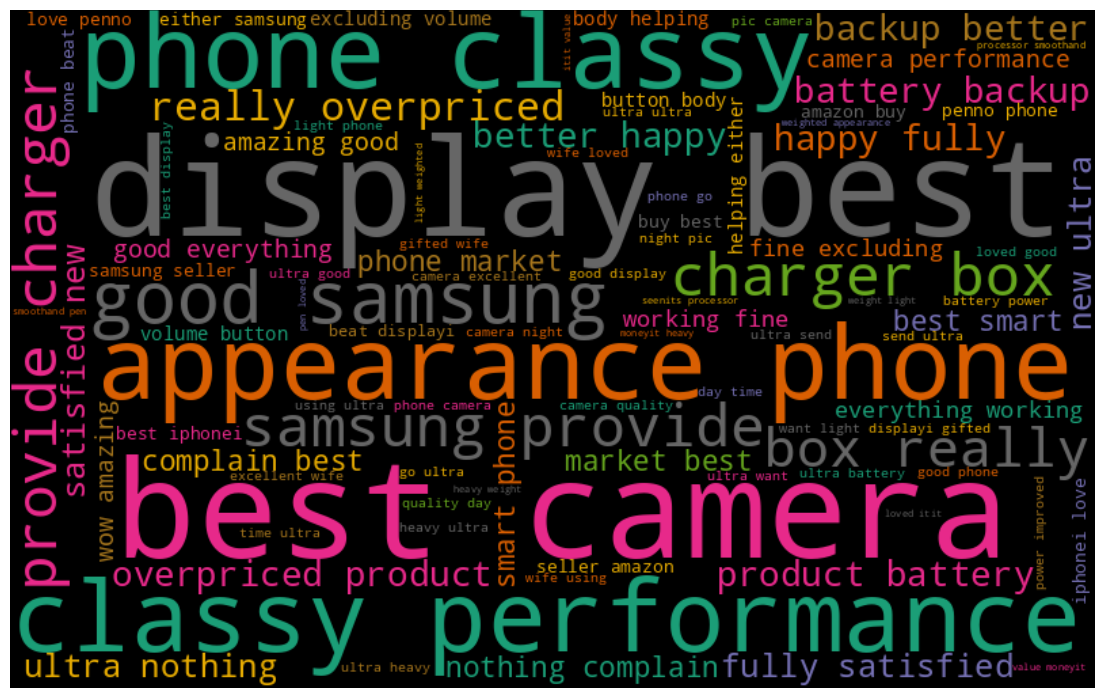

In [333]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

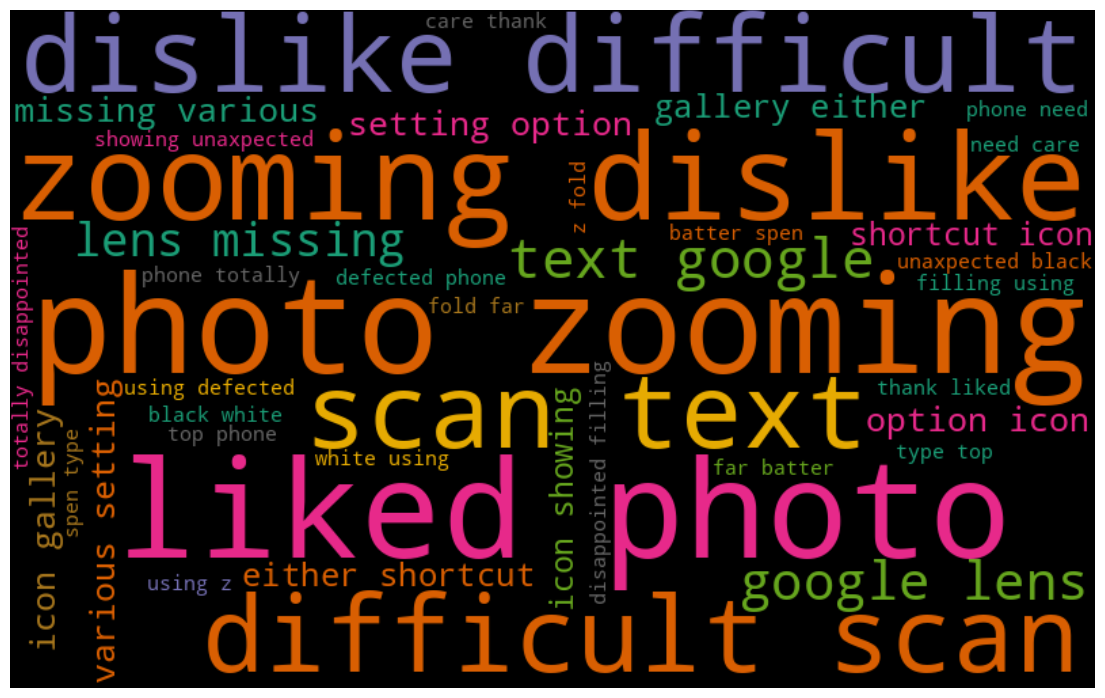

In [334]:
# WordCloud of most common word in negative review
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)